In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install nltk

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [5]:
#we have supervised data
df  ##supervised dataset having only one dependent and one dependent

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [6]:
df.shape

(962, 2)

In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [8]:
compare=df['Category'].unique()
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [9]:
print(len(df['Category'].unique())) #total category we have

25


In [10]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

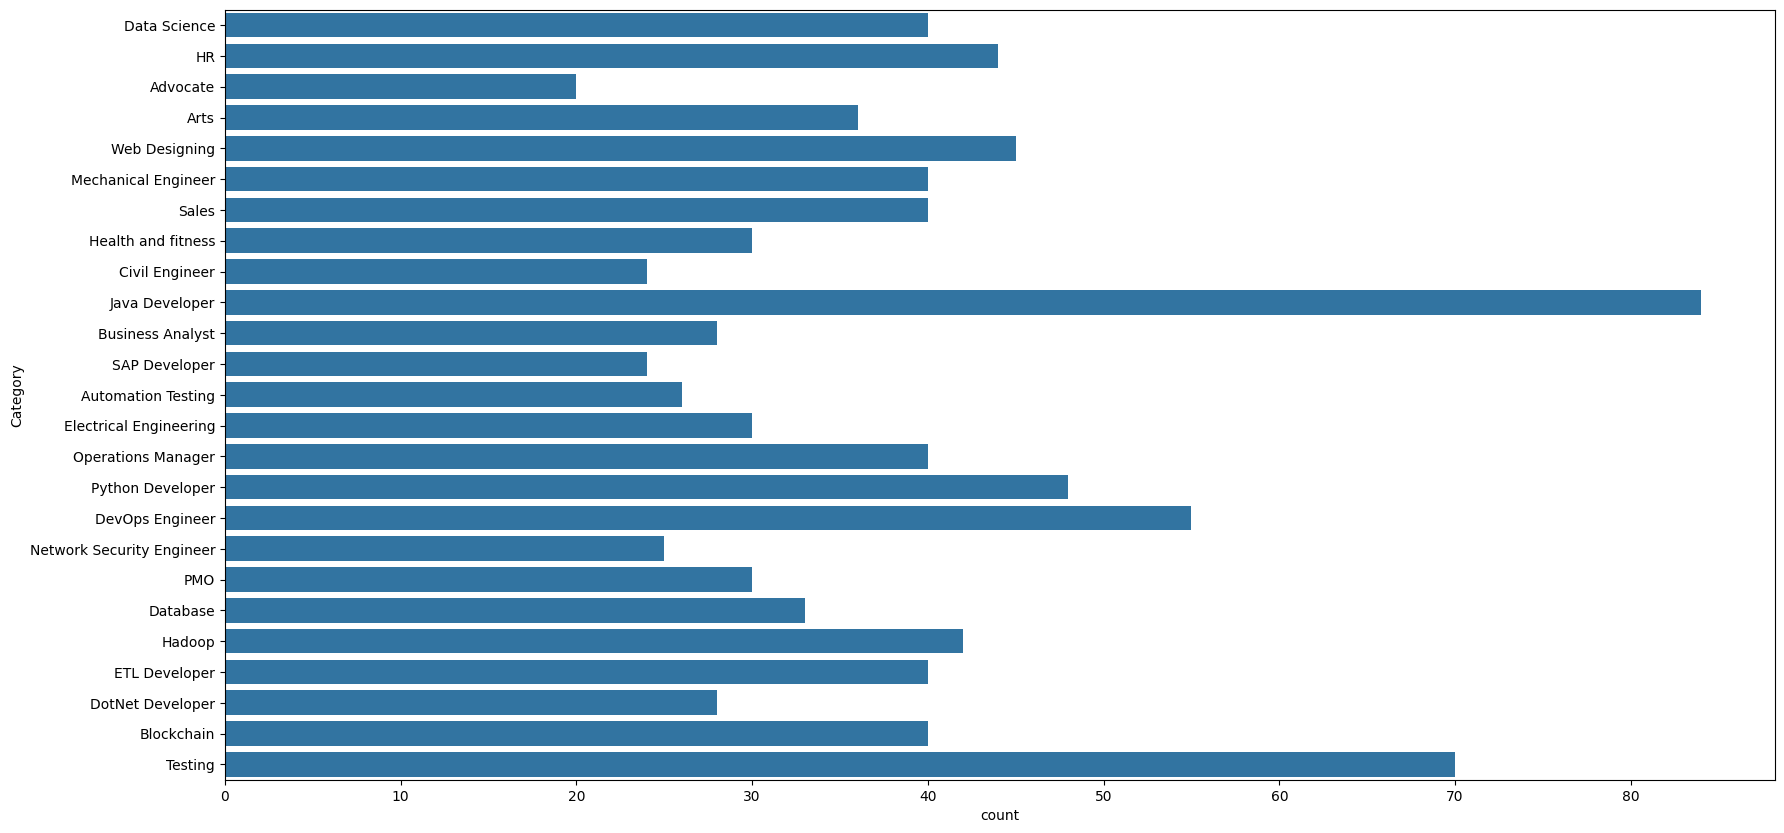

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(df['Category'])
plt.show()

In [15]:
import re
import nltk


In [ ]:
nltk.download('stopwords') #remove words use for grammer only..
nltk.download('punkt_tab') # to tokenize into word or sentences

In [12]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from nltk.stem import WordNetLemmatizer

In [13]:
ps=PorterStemmer()
#wordnet=WordNetLemmatizer()

In [14]:

def cleanResume(txt):
    review=re.sub('[^a-zA-Z]',' ',txt)
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    return review

In [15]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [16]:
df['Resume']

0      skill program languag python panda numpi scipi...
1      educ detail may may b e uit rgpv data scientis...
2      area interest deep learn control system design...
3      skill r python sap hana tableau sap hana sql s...
4      educ detail mca ymcaust faridabad haryana data...
                             ...                        
957    comput skill profici ms offic word basic excel...
958    willing accept challeng posit think good learn...
959    person skill quick learner eager learn new thi...
960    comput skill softwar knowledg ms power point m...
961    skill set os window xp databas mysql sql serve...
Name: Resume, Length: 962, dtype: object

In [17]:
#as we have multiple category for undersatnding of ML model we have to make number
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [19]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [20]:
compare

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf.fit(df['Resume'])
Data=tf.transform(df['Resume'])

NameError: name 'df' is not defined

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Data,df['Category'],test_size=0.20 ,random_state=42)

In [23]:
X_train.shape

(769, 5166)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier()

In [25]:
KNNmodel.fit(X_train,y_train)
y_pred=KNNmodel.predict(X_test)

In [26]:
# from sklearn.tree import DecisionTreeClassifier
# treemodel=DecisionTreeClassifier()

In [27]:
# treemodel.fit(X_train,y_train)
# y_pred=treemodel.predict(X_test)

In [28]:
# from sklearn import tree
# plt.figure(figsize=(15,10))
# tree.plot_tree(treemodel,filled=True,max_depth=5)

In [29]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))

0.9844559585492227


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
          17       1.00    

In [31]:
import pickle

In [32]:
pickle.dump(tf,open('tf.pkl','wb')) # write binary mode
pickle.dump(KNNmodel, open('KNNmodel.pkl', 'wb'))